<a href="https://colab.research.google.com/github/ally-ds/TensorFlow/blob/master/Recycle_Image_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving 678948_1192791_bundle_archive.zip to 678948_1192791_bundle_archive.zip


In [0]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['678948_1192791_bundle_archive.zip']), 'r')
data.extractall()

In [0]:
data.printdir()

In [0]:
import tensorflow as tf
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
folder_name = 'dataset'
base_dir = os.path.join(folder_name)

In [0]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


((64, 224, 224, 3), (64, 4))

In [0]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

{'glass': 0, 'metal': 1, 'paper': 2, 'plastic': 3}


In [0]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [0]:
base_model.trainable = False

In [0]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(4, activation='softmax')
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 4)                 132       
Total params: 2,626,788
Trainable params: 368,804
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
epochs = 10

history = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

Epoch 1/10
72/72 [==============================] - 18s 253ms/step - loss: 1.0062 - accuracy: 0.6266 - val_loss: 0.7308 - val_accuracy: 0.6670
Epoch 2/10
72/72 [==============================] - 16s 226ms/step - loss: 0.6607 - accuracy: 0.7042 - val_loss: 0.6602 - val_accuracy: 0.7502
Epoch 3/10
72/72 [==============================] - 16s 223ms/step - loss: 0.5634 - accuracy: 0.7825 - val_loss: 0.6379 - val_accuracy: 0.7599
Epoch 4/10
72/72 [==============================] - 16s 224ms/step - loss: 0.5045 - accuracy: 0.8040 - val_loss: 0.6059 - val_accuracy: 0.7713
Epoch 5/10
72/72 [==============================] - 16s 223ms/step - loss: 0.4582 - accuracy: 0.8221 - val_loss: 0.6114 - val_accuracy: 0.7783
Epoch 6/10
72/72 [==============================] - 16s 223ms/step - loss: 0.4209 - accuracy: 0.8342 - val_loss: 0.5950 - val_accuracy: 0.7739
Epoch 7/10
72/72 [==============================] - 16s 223ms/step - loss: 0.3929 - accuracy: 0.8427 - val_loss: 0.6343 - val_accuracy: 0.7660

In [0]:
class_names = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Glass', 'Metal', 'Paper', 'Plastic'], dtype='<U7')

In [0]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
label_id = np.argmax(label_batch, axis=-1)
predicted_batch.shape, predicted_id.shape, predicted_label_batch.shape, label_id.

(64, 4)

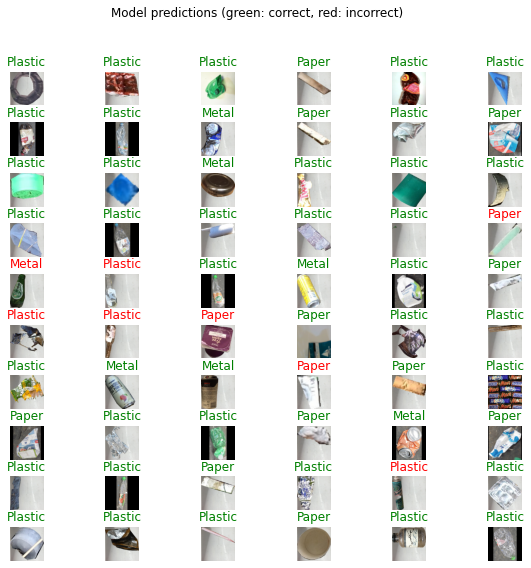

In [0]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(60):
  plt.subplot(10,6,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test_dir.zip to test_dir.zip


In [0]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['test_dir.zip']), 'r')
data.extractall()
data.printdir()


File Name                                             Modified             Size
real_test/glass/KakaoTalk_20200605_214521974.jpg 2020-06-05 21:49:40      2087656
real_test/glass/KakaoTalk_20200605_214523273.jpg 2020-06-05 21:49:26      2239295
real_test/metal/KakaoTalk_20200605_214531375.jpg 2020-06-05 21:47:50      2497521
real_test/metal/KakaoTalk_20200605_214533046.jpg 2020-06-05 21:47:22      3010878
real_test/paper/KakaoTalk_20200605_214524599.jpg 2020-06-05 21:49:10      2078321
real_test/paper/KakaoTalk_20200605_214525788.jpg 2020-06-05 21:48:52      2290817
real_test/plastic/KakaoTalk_20200605_214528012.jpg 2020-06-05 21:48:34      2809487
real_test/plastic/KakaoTalk_20200605_214530268.jpg 2020-06-05 21:48:06      2728667


In [61]:
test_folder_name = 'real_test'
test_dir = os.path.join(test_folder_name)

IMAGE_SIZE = 224
BATCH_SIZE = 64

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE)


for test_image_batch, test_label_batch in test_generator:
  break
test_image_batch.shape, test_label_batch.shape

Found 8 images belonging to 4 classes.


((8, 224, 224, 3), (8, 4))

In [62]:
real_batch = model.predict(test_image_batch)
real_id = np.argmax(real_batch, axis=-1)

real_label_batch = class_names[real_id]
real_label_id = np.argmax(test_label_batch, axis=-1)
real_batch.shape, real_id.shape, real_label_batch.shape, real_label_id.shape

((8, 4), (8,), (8,), (8,))

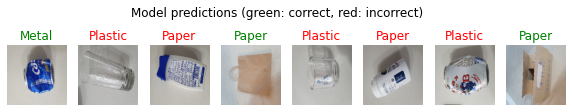

In [68]:
plt.figure(figsize=(10,2))
plt.subplots_adjust(hspace=0.5)
for n in range(8):
  plt.subplot(1,8,n+1)
  plt.imshow(test_image_batch[n])
  color = "green" if real_id[n] == real_label_id[n] else "red"
  plt.title(real_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")